In [ ]:
# Install necessary libraries (if not already installed)
!pip install pandas matplotlib seaborn statsmodels


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# Load the dataset
file_path = '/content/Sample - Superstore.csv'  # Change to your actual file path if you're using Google Drive

# Use the 'encoding' parameter to specify the correct encoding
# Here, we're using 'latin1' as an example. You might need to experiment
# with other encodings like 'cp1252', 'ISO-8859-1' etc., if 'latin1' doesn't work.
data = pd.read_csv(file_path, encoding='latin1')

# Display the first few rows of the dataset
print(data.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Drop duplicates if any
data_cleaned = data.drop_duplicates()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [ ]:
data_cleaned['Order Date'] = pd.to_datetime(data_cleaned['Order Date'])
data_cleaned['Ship Date'] = pd.to_datetime(data_cleaned['Ship Date'])

# Confirm the changes
print(data_cleaned.dtypes)

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object


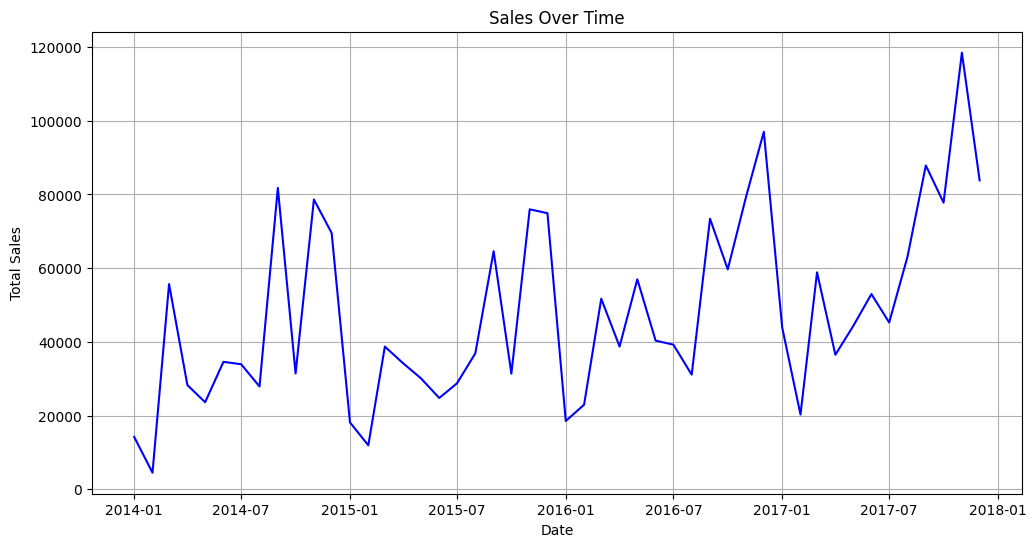

In [ ]:
# Group sales by Order Date for a time series analysis
# Only include 'Sales' column in the aggregation
sales_over_time = data_cleaned.groupby(data_cleaned['Order Date'].dt.to_period("M"))['Sales'].sum()

# Plot the sales trend over time
plt.figure(figsize=(12,6))
plt.plot(sales_over_time.index.to_timestamp(), sales_over_time, color='blue') # sales_over_time now only contains the Sales data
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

<ipython-input-9-620032f6cc99>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='Blues_r')


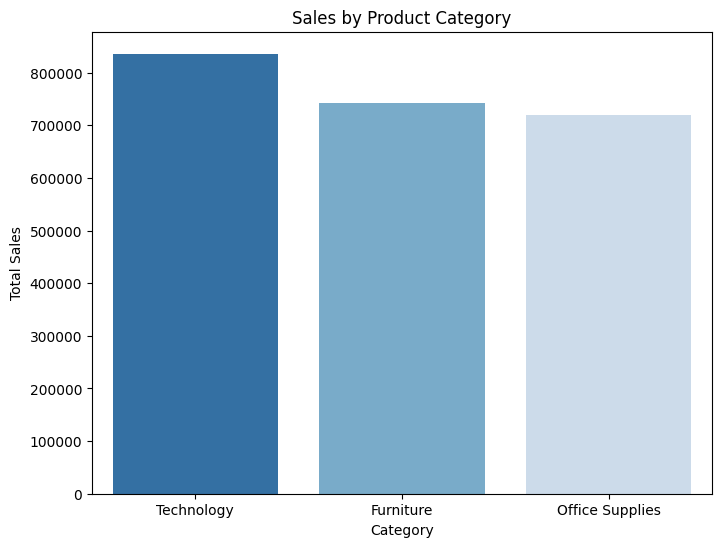

In [ ]:
# Sales by product category
category_sales = data_cleaned.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Plot sales by category
plt.figure(figsize=(8,6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='Blues_r')
plt.title('Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()


<ipython-input-10-5465456e4a8a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_profit.index, y=region_profit.values, palette='Greens_r')


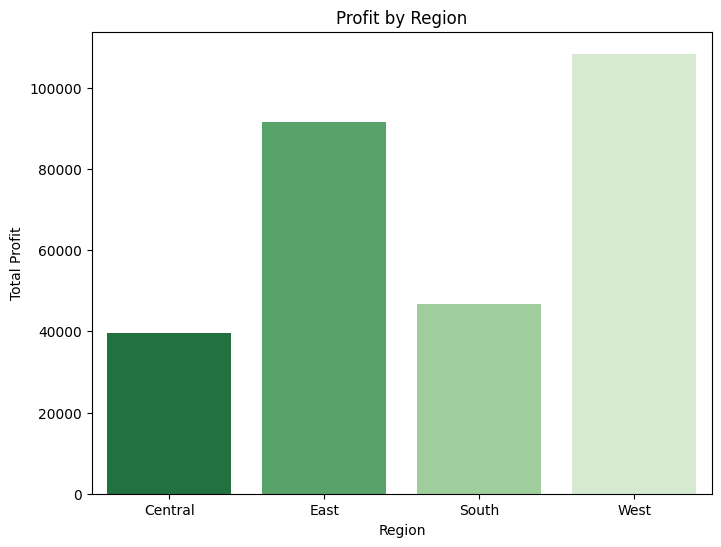

In [ ]:
# Profit by region
region_profit = data_cleaned.groupby('Region')['Profit'].sum()

# Plot the profits by region
plt.figure(figsize=(8,6))
sns.barplot(x=region_profit.index, y=region_profit.values, palette='Greens_r')
plt.title('Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()


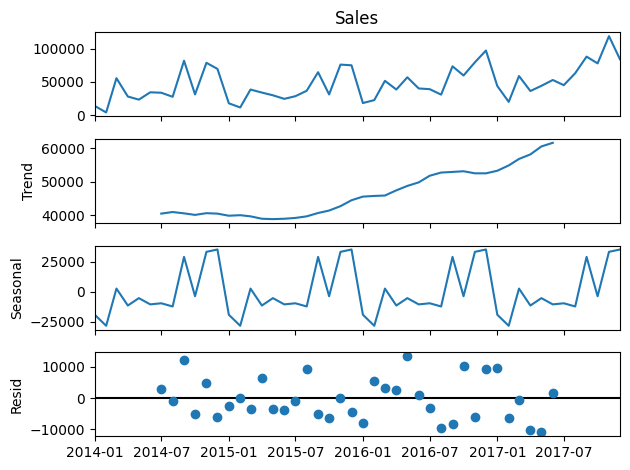

In [ ]:
# Decompose the time series for Sales
# Removed ['Sales'] as sales_over_time already contains the sales data
# Explicitly setting the period to 12 for monthly data
decomposition = seasonal_decompose(sales_over_time, model='additive', period=12)

# Convert the index of sales_over_time to timestamps before decomposition
sales_over_time.index = sales_over_time.index.to_timestamp()

# Perform the decomposition again with the updated index
decomposition = seasonal_decompose(sales_over_time, model='additive', period=12)

decomposition.plot()
plt.show()